In [1]:
#Import the libraries to use
import pandas as pd
import random
import matplotlib.pyplot as plt

In [5]:
y_increment = .25
starting_data_points = 12000

In [7]:
#This function is used to remove a certain percentage of the data, or to thin it
def get_removal_chance(removal_percent=.2):
    rem = removal_percent
    binary_lst = [0,1]
    removal_weight = [rem,1-rem]
    removal = random.choices(binary_lst,removal_weight)[0]
    return(removal)

In [18]:
#I am going to have 3 variables that effect the solution but when making the data I need to work backwards
#First I need to populate the solution, y, and then set the relationship with the variables
#One variable will have a ratio of 1.75, another 42.69, to have a scale difference, and the last, -2.5
w=[]
x=[]
y=[]
z=[]
remove=[]
for point in range(starting_data_points):
    y.append((point+1)*y_increment)
    w.append(y[point]*(1.75))
    x.append(y[point]*(69.42))
    z.append(y[point]*(-2.5))
    remove.append(get_removal_chance(.75))

dict = {'solution':y,'var_1':w,'var_2':x,'var_3':z,'removal_odds':remove}
m_l=pd.DataFrame(dict)

In [19]:
var_1 = 1.6*m_l['var_1']
var_2 = .03*m_l['var_2']
var_3 = 1.8*m_l['var_3']
m_l['new_solution'] = var_1 + var_2 + var_3                                  

In [29]:
m_l['decider'] = m_l['new_solution'].apply(lambda x: 1 if x >= 625 else 0)
#simple_linear_light['answer'] = simple_linear_light['variable'].apply(lambda x: 1 if x >= 750 else 0)

In [30]:
m_l.describe()

,solution,var_1,var_2,var_3,removal_odds,new_solution,decider
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,1500.125000,2625.218750,104138.677500,-3750.312500,0.247083,573.947825,0.455500
std,866.061487,1515.607603,60121.988457,2165.153719,0.431334,331.355125,0.498037
min,0.250000,0.437500,17.355000,-7500.000000,0.000000,0.095650,0.000000
25%,750.187500,1312.828125,52078.016250,-5625.156250,0.000000,287.021737,0.000000
50%,1500.125000,2625.218750,104138.677500,-3750.312500,0.000000,573.947825,0.000000
75%,2250.062500,3937.609375,156199.338750,-1875.468750,0.000000,860.873912,1.000000
max,3000.000000,5250.000000,208260.000000,-0.625000,1.000000,1147.800000,1.000000


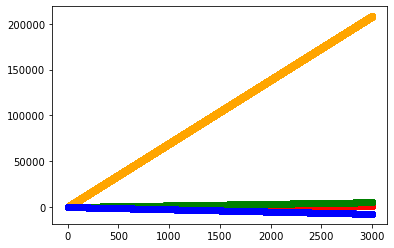

In [31]:
plt.scatter(m_l['solution'],m_l['new_solution'],c='red')
plt.scatter(m_l['solution'],m_l['var_1'],c='green')
plt.scatter(m_l['solution'],m_l['var_2'],c='orange')
plt.scatter(m_l['solution'],m_l['var_3'],c='blue')

In [46]:
def randomizer(stabilizer):
    pos_or_neg_lst = [-1,1]
    population = [1,1.5,2,2.5,3,4,5,10]
    weight = [32.5,20,15,10,9,7.5,5,.5]
    rand = random.random()
    get_pos_or_neg = float(random.choice(pos_or_neg_lst))
    multiplier = random.choices(population,weight,k=1)
    random_number = stabilizer*rand*get_pos_or_neg*multiplier[0]
    return(random_number)

In [63]:
#m_l['var_1'].quantile(.25)
var_1_05 = m_l['var_1'].quantile(.2)
var_2_05 = m_l['var_2'].quantile(.2)
var_3_05 = m_l['var_3'].quantile(.8)

In [64]:
var_1_rand=[]
var_2_rand=[]
var_3_rand=[]
for point in range(starting_data_points):
    var_1_rand.append(randomizer(var_1_05))
    var_2_rand.append(randomizer(var_2_05))
    var_3_rand.append(randomizer(var_3_05))

dict_2 = {'var_1_rand':var_1_rand,'var_2_rand':var_2_rand,'var_3_rand':var_3_rand}
m_l_2=pd.DataFrame(dict_2)

In [65]:
m_l_3 = pd.concat([m_l,m_l_2], axis=1)

In [66]:
m_l_3.head()

,solution,var_1,var_2,var_3,removal_odds,new_solution,decider,var_1_rand,var_2_rand,var_3_rand
0,0.25,0.4375,17.355,-0.625,0,0.09565,0,245.465196,54335.546742,1223.874068
1,0.50,0.8750,34.710,-1.250,1,0.19130,0,-986.952482,-42618.057581,-2935.985017
2,0.75,1.3125,52.065,-1.875,0,0.28695,0,1921.622906,-33929.445030,-825.685394
3,1.00,1.7500,69.420,-2.500,0,0.38260,0,475.695443,-26832.360424,2883.490056
4,1.25,2.1875,86.775,-3.125,0,0.47825,0,70.787167,67855.015205,-3708.453261


In [67]:
m_l_3['new_var_1'] = m_l_3.var_1 + m_l_3.var_1_rand
m_l_3['new_var_2'] = m_l_3.var_2 + m_l_3.var_2_rand
m_l_3['new_var_3'] = m_l_3.var_3 + m_l_3.var_3_rand

In [68]:
m_l_3.sample(8)

,solution,var_1,var_2,var_3,removal_odds,new_solution,decider,var_1_rand,var_2_rand,var_3_rand,new_var_1,new_var_2,new_var_3
1985,496.50,868.8750,34467.030,-1241.250,0,189.96090,0,1603.942264,-3370.492244,2755.461624,2472.817264,31096.537756,1514.211624
10139,2535.00,4436.2500,175979.700,-6337.500,1,969.89100,1,-11.441716,-20637.701076,1848.704117,4424.808284,155341.998924,-4488.795883
10257,2564.50,4487.8750,178027.590,-6411.250,0,981.17770,1,404.381453,71152.820296,-1798.068331,4892.256453,249180.410296,-8209.318331
8451,2113.00,3697.7500,146684.460,-5282.500,0,808.43380,1,1577.584987,23294.040950,934.434333,5275.334987,169978.500950,-4348.065667
4200,1050.25,1837.9375,72908.355,-2625.625,0,401.82565,0,-1266.760765,-99622.316592,986.567740,571.176735,-26713.961592,-1639.057260
10573,2643.50,4626.1250,183511.770,-6608.750,1,1011.40310,1,3807.023005,-64586.149192,695.333069,8433.148005,118925.620808,-5913.416931
459,115.00,201.2500,7983.300,-287.500,0,43.99900,0,-107.564057,-10269.760044,1812.712177,93.685943,-2286.460044,1525.212177
9981,2495.50,4367.1250,173237.610,-6238.750,0,954.77830,1,1124.693187,36780.345999,39.783977,5491.818187,210017.955999,-6198.966023


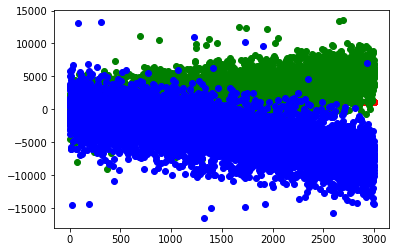

In [70]:
plt.scatter(m_l_3['solution'],m_l_3['new_solution'],c='red')
plt.scatter(m_l_3['solution'],m_l_3['new_var_1'],c='green')
#plt.scatter(m_l['solution'],m_l['var_2'],c='orange')
plt.scatter(m_l_3['solution'],m_l_3['new_var_3'],c='blue')

In [71]:
var_1 = 1.6*m_l_3['new_var_1']
var_2 = .03*m_l_3['new_var_2']
var_3 = 1.8*m_l_3['new_var_3']
m_l_3['final_results'] = var_1 + var_2 + var_3         

In [72]:
m_l_3.head()

,solution,var_1,var_2,var_3,removal_odds,new_solution,decider,var_1_rand,var_2_rand,var_3_rand,new_var_1,new_var_2,new_var_3,final_results
0,0.25,0.4375,17.355,-0.625,0,0.09565,0,245.465196,54335.546742,1223.874068,245.902696,54352.901742,1223.249068,4225.879688
1,0.50,0.8750,34.710,-1.250,1,0.19130,0,-986.952482,-42618.057581,-2935.985017,-986.077482,-42583.347581,-2937.235017,-8142.247430
2,0.75,1.3125,52.065,-1.875,0,0.28695,0,1921.622906,-33929.445030,-825.685394,1922.935406,-33877.380030,-827.560394,570.766539
3,1.00,1.7500,69.420,-2.500,0,0.38260,0,475.695443,-26832.360424,2883.490056,477.445443,-26762.940424,2880.990056,5146.806598
4,1.25,2.1875,86.775,-3.125,0,0.47825,0,70.787167,67855.015205,-3708.453261,72.974667,67941.790205,-3711.578261,-4525.827696


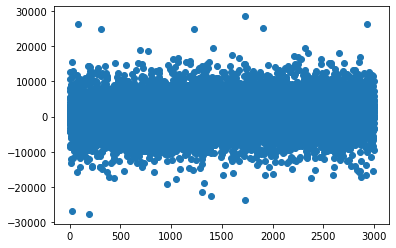

In [73]:
plt.scatter(m_l_3['solution'],m_l_3['final_results'])